# Identify ROIs and Display Them

ROI identification from three key interactions and display them with different colors

In [1]:
import os 
import pandas as pd
import glob
import numpy as np
import json
import nibabel as nib
import nilearn.plotting
import shutil
from bids import BIDSLayout, BIDSValidator
from nilearn import plotting, image
from nilearn.glm import threshold_stats_img

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/envs/fmri01/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/miniconda3/envs/fmri01/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [2]:
target_list = ['image_condition', 'gamble_choice',
       'image_condition:gamble_choice', 'prev_image',
       'image_condition:prev_image', 'gamble_choice:prev_image',
       'image_condition:gamble_choice:prev_image', 'prev_choice',
       'image_condition:prev_choice', 'gamble_choice:prev_choice',
       'image_condition:gamble_choice:prev_choice', 'prev_image:prev_choice',
       'image_condition:prev_image:prev_choice',
       'gamble_choice:prev_image:prev_choice',
       'image_condition:gamble_choice:prev_image:prev_choice']


In [4]:
# set paths for directories

user_path = os.path.expanduser('~')
home_path = os.path.join('/Volumes','nova')
project_path = os.path.join(home_path,'projects','2019_Gamble_fMRI')
data_path = os.path.join(project_path,'data')
fmriprep_path = os.path.join(project_path,'data','derivatives','fmriprep')
betaseries_path = os.path.join(project_path,'data','derivatives','nibetaseries_orig')

note_path = os.path.join(user_path,'Desktop','GamblefMRI','runs','searchlight_lmer13')
mask_path = os.path.join(note_path,'mask_thre')

if not os.path.exists(mask_path):
    os.mkdir(mask_path) 

### Create mask images for the key contrasts

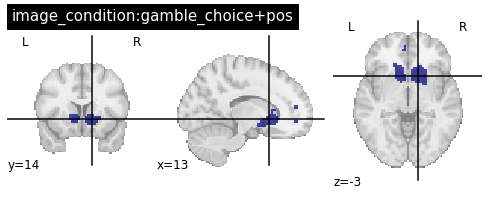

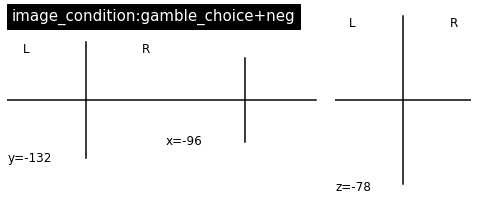

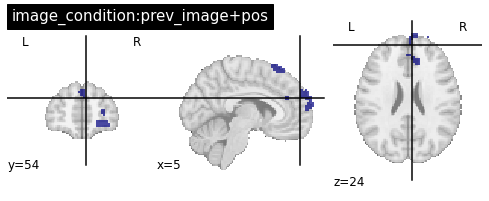

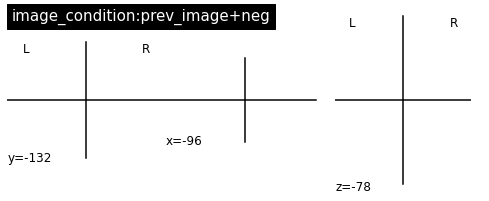

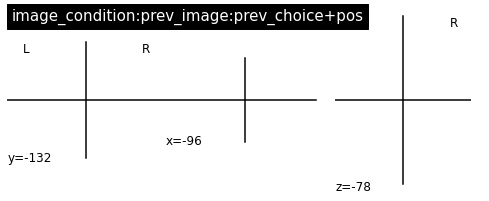

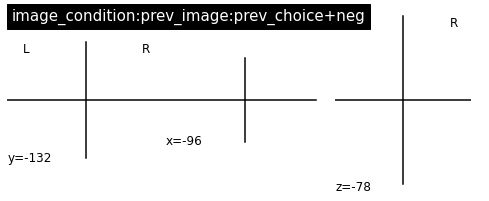

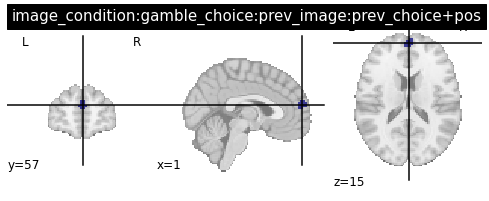

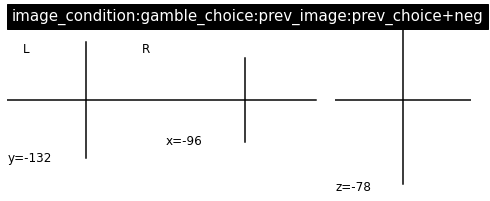

In [7]:
target_list = ['image_condition:gamble_choice',
               'image_condition:prev_image',
               'image_condition:prev_image:prev_choice',
               'image_condition:gamble_choice:prev_image:prev_choice']
               
tfce_image = []

for this_target in target_list:
    
    for idx_dir, this_dir in enumerate(['pos','neg']):
    
       
        stat_path = os.path.join(note_path,'level2',this_target,
                                 'randomise_%s_rad-1' %(this_dir),
                                 'randomise_tfce_corrp_tstat1.nii.gz')
        
        filename = os.path.join(mask_path,
                                'tfce975_dir-%s_desc-%s_mask.nii.gz' %(this_dir,this_target))      
        img_mask = image.math_img('img > 0.975', img = stat_path)
        img_mask.to_filename(filename)
        plotting.plot_roi(img_mask,
                         title = '%s+%s' %(this_target, this_dir))
        
  

## Draw Combined Regions with Different Colors

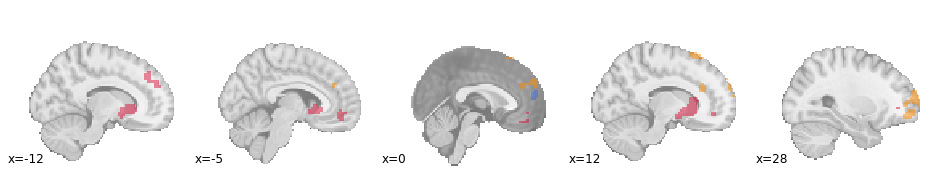

In [23]:
target_list = ['image_condition:gamble_choice',
               'image_condition:prev_image',
               'image_condition:prev_image:prev_choice',
               'image_condition:gamble_choice:prev_image:prev_choice']

# https://matplotlib.org/stable/gallery/color/named_colors.html

tfce_color = {'pos':['crimson','darkorange','seagreen','royalblue'],
             'neg':['tomato','orange','lawngreen','cyan']}

display = plotting.plot_anat(display_mode = 'x',
                             cut_coords = [-12, -5, 0, 12, 28])

for idx_target, this_target in enumerate(target_list):
    for idx_dir, this_dir in enumerate(['pos','neg']): # there is no negative network

        filename = os.path.join(mask_path,
                                'tfce975_dir-%s_desc-%s_mask.nii.gz' %(this_dir,this_target))
        display.add_overlay(filename,
                            cmap = plotting.cm.alpha_cmap(tfce_color[this_dir][idx_target]))
        
display.savefig(os.path.join(note_path,'figures','brain-x-cut.svg'))

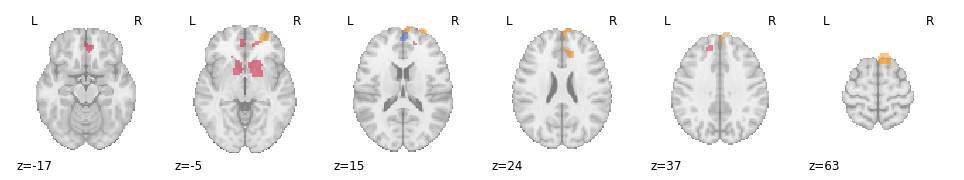

In [25]:
target_list = ['image_condition:gamble_choice',
               'image_condition:prev_image',
               'image_condition:prev_image:prev_choice',
               'image_condition:gamble_choice:prev_image:prev_choice']

# https://matplotlib.org/stable/gallery/color/named_colors.html

tfce_color = {'pos':['crimson','darkorange','seagreen','royalblue'],
             'neg':['tomato','orange','lawngreen','cyan']}

display = plotting.plot_anat(display_mode = 'z',
                             cut_coords = [-17, -5, 15, 24, 37, 63])

for idx_target, this_target in enumerate(target_list):
    for idx_dir, this_dir in enumerate(['pos','neg']): # there is no negative network

        filename = os.path.join(mask_path,
                                'tfce975_dir-%s_desc-%s_mask.nii.gz' %(this_dir,this_target))
        display.add_overlay(filename, cmap = plotting.cm.alpha_cmap(tfce_color[this_dir][idx_target]))
        
display.savefig(os.path.join(note_path,'figures','brain-z-cut.svg'))

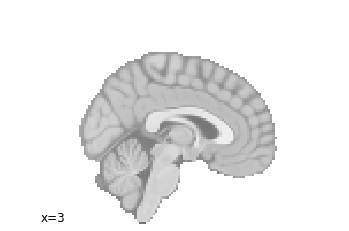

In [18]:
fig, ax = plt.subplots(1,1)
display = plotting.plot_anat(display_mode = 'x',
                             cut_coords = [3],
                             axes=ax)

display.savefig(os.path.join(note_path,'Figures','brain-anat-x.svg'))

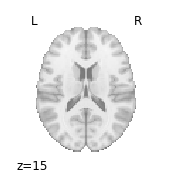

In [21]:
display = plotting.plot_anat(display_mode = 'z',
                             cut_coords = [15])
display.savefig(os.path.join(note_path,'Figures','brain-anat-z.svg'))

### Get cluster table

nilearn.reporting.get_clusters_table(stat_img, stat_threshold, cluster_threshold=None, two_sided=False, min_distance=8.0)[source]

In [27]:
from nilearn.reporting import get_clusters_table

In [33]:
target_list = ['image_condition:gamble_choice',
               'image_condition:prev_image',
               'image_condition:prev_image:prev_choice',
               'image_condition:gamble_choice:prev_image:prev_choice']


for idx_target, this_target in enumerate(target_list):
    for idx_dir, this_dir in enumerate(['pos','neg']): # there is no negative network

        stat_path = os.path.join(note_path,'level2',this_target,
                                 'randomise_%s_rad-1' %(this_dir),
                                 'randomise_tfce_corrp_tstat1.nii.gz')
        table = get_clusters_table(stat_path,
                                   stat_threshold = 0.975)
        print(table)

   Cluster ID     X     Y     Z  Peak Stat Cluster Size (mm3)
0           1  11.5  17.5  -3.5      0.997               5454
1          1a  14.5   2.5  -9.5      0.994                   
2          1b  20.5  17.5  -3.5      0.994                   
3          1c  23.5   5.5  -3.5      0.991                   
4           2  -9.5  17.5  -3.5      0.991               3078
5           3 -15.5  41.5  38.5      0.983               1296
6          3a -15.5  50.5  29.5      0.978                   
7           4  -6.5  47.5  -9.5      0.980               2376
8          4a   5.5  41.5 -18.5      0.979                   
9          4b   5.5  41.5 -27.5      0.977                   
10         4c  14.5  47.5  -6.5      0.977                   
11          5  17.5  47.5  11.5      0.978                837
12         5a  23.5  41.5   8.5      0.978                   
13         5b  26.5  41.5  -0.5      0.977                   
14          6 -21.5  50.5 -12.5      0.977                 81
Empty Da

   Cluster ID     X     Y     Z  Peak Stat Cluster Size (mm3)
0           1  11.5  17.5  -3.5      0.997               5454: vCa_R
1          1a  14.5   2.5  -9.5      0.994  : NAC_R                 
2          1b  20.5  17.5  -3.5      0.994  : vmPu_R                 
3          1c  23.5   5.5  -3.5      0.991  : vmPu_R 

4           2  -9.5  17.5  -3.5      0.991               3078: vCa_L

5           3 -15.5  41.5  38.5      0.983               1296: A8dl
6          3a -15.5  50.5  29.5      0.978  : A9l_L

7           4  -6.5  47.5  -9.5      0.980               2376: A14m_L
8          4a   5.5  41.5 -18.5      0.979  : A11m_R                  
9          4b   5.5  41.5 -27.5      0.977  : A11m_R                 
10         4c  14.5  47.5  -6.5      0.977  : A14m_R    

11          5  17.5  47.5  11.5      0.978                837 : A10m_R
12         5a  23.5  41.5   8.5      0.978  : white matter                   
13         5b  26.5  41.5  -0.5      0.977  : white matter

14          6 -21.5  50.5 -12.5      0.977                 81 : A11l_L

Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []
  Cluster ID     X     Y     Z  Peak Stat Cluster Size (mm3)
0          1  29.5  59.5  -9.5      0.993               1674 : A10l_R
1         1a  23.5  53.5  -9.5      0.992                    : A11l_R

2          2   8.5  26.5  65.5      0.992               2106 : A8m_R

3          3  32.5  68.5   8.5      0.992               2484 : A46_R
4         3a  29.5  53.5   5.5      0.980                    : A46_R
5         3b  17.5  50.5  11.5      0.977                    : A46 R

6          4   2.5  56.5  29.5      0.990               4158 : A9m_R
7         4a   8.5  65.5  26.5      0.990                    : A10m_R
8         4b   5.5  65.5  14.5      0.990                    : A10m_R
9         4c  14.5  32.5  23.5      0.990                    : A9m_R

Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []
Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []
Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []
   Cluster ID    X     Y     Z  Peak Stat  Cluster Size (mm3)
0           1 -0.5  56.5  17.5      0.979                 837 : A10m_L & A10m_R
Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []